(sec-qcoin)=
# Tossing a quantum coin

It is a common practice to pick one of two choices by tossing up a coin.  The classical motion of coin is chaotic and approximately the probability to get head and tail is equal. We can simulate the process on classical computer using random number generator.  Such simulation is known as Monte Carlo simulation after the name of famous casino city.  One  can simulate the same process on a quantum computer without random numbers by exploiting the stochastic nature of quantum measurement.  In the following, both a classical and quantum simulation are shown.

## Classical simulation

In [1]:
# Classical Monte Carlo simulation of coin tossing
import numpy as np

# coin is tossed 10000 times for statistical analysis
shots=10000

# generate random number
c = np.random.rand(shots)

# count number of heads and tails
# if the random number is less than 0.5, it is head.
# otherwise, it is tail.
head = np.sum(c<0.5)
tail = shots-head

# print out the probabilities
print("head=",head/shots)
print("tail=",tail/shots)


head= 0.4962
tail= 0.5038


## Quantum simulation

To demonstrate the stochastic nature of quantum measurement, we consider a quantum coin.  The quantum coin has two states, head and tail. We assign the head to $|0\rangle$ and the tail to $|1\rangle$  The superposition state $|\psi\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle+|1\rangle\right)$ indicates that the state of the quantum coin is neither head nor tail.  Based on the Born rule, the chance to get head is 50% and tail 50%.  Since the outcome is completely random, measuring the state of the quantum coin is equivalent to tossing a classical coin.

In the following qiskit code, the superposition state using a Hadamard gate (we will discuss this in next chapter) and then the state of the qubit is measured.  The result is stored in a classical bit. The quantum computation is simulated with `qasm_simulator` on your computer instead of sending the code to a real quantum computer. (We will send this to real quantum computer in a later chapter.) We repeat the simulation 10000 times and find the probabilities to find head and tail. Since the number of samplings is finite, the result is not exactly 50%-50% but close to  it.

In [2]:
# To run this code in Google Colab
# uncomment and execute the following line
#!pip install qiskit ipywidgets pylatexenc

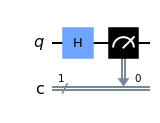

In [3]:
# Tossing Up Quantum Coin

# import numpy
import numpy as np

# import entire qiskit
from qiskit import *

# set classical register (bit)
cr = ClassicalRegister(1,'c')

# set quantum register (qubit)
qr = QuantumRegister(1,'q')

# reset the quantum circuit
qc = QuantumCircuit(qr,cr)

# construct quantum circuit
# step 1: create the superposition state with Hardamard gate
qc.h(0)

# measurement on qubit 
# output is stored in cllasical register
qc.measure(qr,cr)

# show the quantum circuit
qc.draw('mpl')

The quantum circuit shows two lines, one for quantum register and the other for classical register.  The classical register contains a bit.  Usually the outcome of measurement on a qubit is stored. The quantum register contains a qubit.  It is initially reset to $|0\rangle$.  The diagram shows that a single-qubit gate $H$ (Hadamard gate) is applied on the qubit.  The outcome is $H |0\rangle = \frac{1}{\sqrt{2}} \left(|0\rangle + |1\rangle \right)$.  The next gate shows that the state of the qubit is measured and the result, either $0$ or $1$, is sent to the classical register.  In the current example, $0$ or $1$ is obtained with the equal probability.  Now, we execute the circuit.

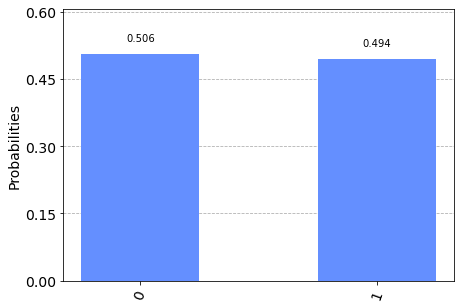

In [4]:
# Chose a general quantum simulator without noise.
# The simulator behaves as an ideal quantum computer.
backend = Aer.get_backend('qasm_simulator')

# Execute the quantum circuit 10000 times
job = backend.run(qc,shots=10000)

# get the result
result = job.result()

# Count the outcome
# Numbers of |0> and |1>
counts = result.get_counts()

# Visualize the outcome
# import histgram plotting function
from qiskit.visualization import plot_histogram
plot_histogram(counts)

# The result should be close to 0.5 for both |0> and |1>.

The outcome is not exactly 50%-50%.  This is because the simulation is executed with a finite shots and thus there is statistical error due to finite sampling.  Theoretically infinite sampling is required but practically it is not possible. However, this is not an issue of quantum computation. 